In [1]:
## This is the SMOTE section. Run once before training and then comment our for convienience 

# import pandas as pd
# from imblearn.over_sampling import SMOTE
# from collections import Counter

# # Load your dataset here (replace 'your_dataset.csv' with your actual dataset file)
# data = pd.read_csv('AllTogether_30_09.csv')

# # Assuming 'material_type' is the column that indicates the material type
# X = data.drop(columns=['Material_Type'])
# y = data['Material_Type']

# # Initialize SMOTE with the desired number of samples for each class (e.g., 100)
# desired_samples = 6000
# smote = SMOTE(sampling_strategy={material_type: desired_samples for material_type in y.unique()})

# # Apply SMOTE to the dataset
# X_resampled, y_resampled = smote.fit_resample(X, y)

# # Check the new class distribution
# print("Class distribution after SMOTE:", Counter(y_resampled))

# # Now you can use X_resampled and y_resampled as your balanced dataset

# # Create a new DataFrame with the resampled data
# resampled_data = pd.DataFrame(X_resampled, columns=X.columns)
# resampled_data['Material_Type'] = y_resampled

# # Save the resampled data to a CSV file
# resampled_data.to_csv('test_resampled.csv', index=False)


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import EarlyStopping

# Load the dataset
data = pd.read_csv("test_resampled.csv")

# Separate features and labels. This is splitting the data and labels
X = data.drop(columns=["Material_Type"])
y = data["Material_Type"]


In [3]:
# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into train and test sets (Normal)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Normalize features. My theoretical max scan value is 8388538, so i normalise everything against a bigger number just incase.
X_train_normalized = ((X_train - 0) / (8410000 - 0))
X_test_normalized = ((X_test - 0) / (8410000 - 0))

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation="softmax")
])

Epoch 1/500
69/69 [==============================] - 1s 4ms/step - loss: 1.6753 - accuracy: 0.3104 - val_loss: 1.5287 - val_accuracy: 0.5049
Epoch 2/500
69/69 [==============================] - 0s 2ms/step - loss: 1.3677 - accuracy: 0.5115 - val_loss: 1.2446 - val_accuracy: 0.6053
Epoch 3/500
69/69 [==============================] - 0s 2ms/step - loss: 1.1678 - accuracy: 0.5926 - val_loss: 1.1004 - val_accuracy: 0.6402
Epoch 4/500
69/69 [==============================] - 0s 3ms/step - loss: 1.0461 - accuracy: 0.6473 - val_loss: 0.9904 - val_accuracy: 0.6569
Epoch 5/500
69/69 [==============================] - 0s 2ms/step - loss: 0.9447 - accuracy: 0.6575 - val_loss: 0.8971 - val_accuracy: 0.6934
Epoch 6/500
69/69 [==============================] - 0s 2ms/step - loss: 0.8633 - accuracy: 0.6917 - val_loss: 0.8254 - val_accuracy: 0.7062
Epoch 7/500
69/69 [==============================] - 0s 2ms/step - loss: 0.8032 - accuracy: 0.7141 - val_loss: 0.7810 - val_accuracy: 0.7218
Epoch 8/500
6

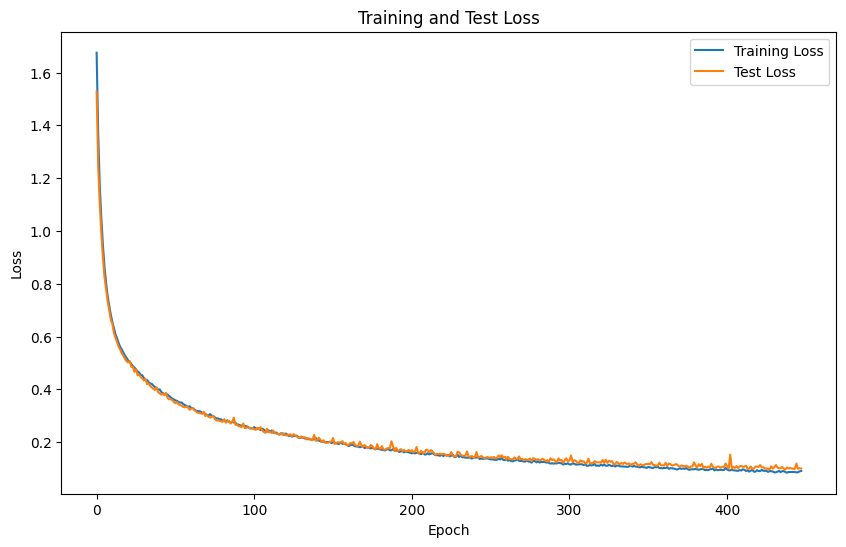

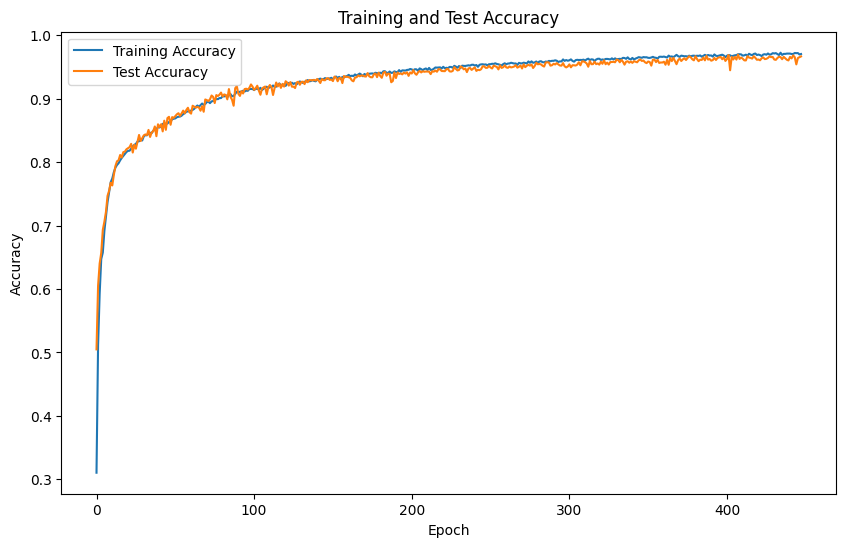

In [4]:
# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_normalized, y_train, epochs=500, batch_size=256, validation_split=0.3, callbacks=[early_stopping])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_normalized, y_test)

# Save the model
# model.save("test_model.keras")

## This next bit is plotting the validation loss and accuracy. Very helpful visulisation for overfitting

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()
plt.show()



In [5]:
# Make predictions
predictions = model.predict(X_test_normalized)
predicted_labels = np.argmax(predictions, axis=1)
predicted_plastic_types = label_encoder.inverse_transform(predicted_labels)



# Convert predictions to percentage likelihood
percentage_likelihood = predictions.max(axis=1) * 100

# Display test accuracy and example predictions
print(f"Test Accuracy: {test_accuracy}")
for i in range(15):
    if y_test[i] == predicted_labels[i]:
        CorF = "Correct"
    else:
        CorF = "False"
    print(f"Sample {i+1}: {CorF} Predicted {predicted_plastic_types[i]} with {percentage_likelihood[i]:.2f}% likelihood")




total_params = model.count_params()
total_size_bytes = total_params * 4  # Each parameter is usually a 32-bit float
total_size_mb = total_size_bytes / (1024)  # Convert bytes to megabytes

print(f"Total size of the model: {total_size_mb:.2f} KB")


338/338 [==============================] - 0s 555us/step
Test Accuracy: 0.9687963128089905
Sample 1: Correct Predicted PLA with 100.00% likelihood
Sample 2: Correct Predicted PP with 91.35% likelihood
Sample 3: Correct Predicted PP with 98.16% likelihood
Sample 4: Correct Predicted PVC with 96.02% likelihood
Sample 5: Correct Predicted PET with 100.00% likelihood
Sample 6: Correct Predicted PE with 99.50% likelihood
Sample 7: Correct Predicted PET with 100.00% likelihood
Sample 8: Correct Predicted Unknown with 98.79% likelihood
Sample 9: Correct Predicted PLA with 100.00% likelihood
Sample 10: False Predicted PP with 91.60% likelihood
Sample 11: Correct Predicted PLA with 100.00% likelihood
Sample 12: Correct Predicted PET with 95.89% likelihood
Sample 13: Correct Predicted PP with 99.43% likelihood
Sample 14: Correct Predicted PLA with 100.00% likelihood
Sample 15: Correct Predicted PE with 91.49% likelihood
Total size of the model: 41.77 KB


In [6]:
# Make predictions
predictions = model.predict(X_test_normalized)

# Get the top 4 predictions for each sample
top_predictions = np.argsort(predictions, axis=1)[:, -5:]
top_labels = top_predictions[:, ::-1]

# print(predictions)

# Reshape the top_labels array to be 1D
top_labels_1d = top_labels.reshape(-1)

# Inverse transform the labels
top_plastic_types = label_encoder.inverse_transform(top_labels_1d)

# Reshape the top_plastic_types array back to 2D
top_plastic_types = top_plastic_types.reshape(top_labels.shape)

# Get the percentage likelihoods for the top 4 predictions
percentage_likelihoods = np.take_along_axis(predictions, top_predictions, axis=1) * 100

# Display test accuracy and example predictions
print(f"Test Accuracy: {test_accuracy}")
for i in range(len(predicted_labels)):
    num_predictions = min(5, len(np.unique(top_labels[i])))
    if y_test[i] == predicted_labels[i]:
        CorF = "Correct,"
    else:
        CorF = "False,"
    print(f"Sample {i+1}: {CorF} it was {label_encoder.classes_[y_test[i]]}")
    for j in range(num_predictions):
        print(f"  Prediction {j+1}: {top_plastic_types[i][j]} with {percentage_likelihoods[i][1-j]:.2f}% likelihood") #put in '1' for HvL and '3' for the others

338/338 [==============================] - 0s 552us/step
Test Accuracy: 0.9687963128089905
Sample 1: Correct, it was PLA
  Prediction 1: PLA with 0.00% likelihood
  Prediction 2: Unknown with 0.00% likelihood
  Prediction 3: PP with 100.00% likelihood
  Prediction 4: PE with 0.00% likelihood
  Prediction 5: PVC with 0.00% likelihood
Sample 2: Correct, it was PP
  Prediction 1: PP with 0.00% likelihood
  Prediction 2: PE with 0.00% likelihood
  Prediction 3: Unknown with 91.35% likelihood
  Prediction 4: PLA with 8.65% likelihood
  Prediction 5: PVC with 0.00% likelihood
Sample 3: Correct, it was PP
  Prediction 1: PP with 0.00% likelihood
  Prediction 2: PE with 0.00% likelihood
  Prediction 3: Unknown with 98.16% likelihood
  Prediction 4: PLA with 1.84% likelihood
  Prediction 5: PVC with 0.00% likelihood
Sample 4: Correct, it was PVC
  Prediction 1: PVC with 0.00% likelihood
  Prediction 2: Unknown with 0.00% likelihood
  Prediction 3: PP with 96.02% likelihood
  Prediction 4: PE wi